# 3 Aplicación de algoritmos de densidad

## Importación de las librerías necesarias

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D

## Leer el dataset

In [2]:
df = pd.read_csv('/content/sample_data/Tourists_data.csv')

## 3.1 Preprocesado

Correspondiente con :
- **Tarea 4.1**:  Realiza el pre-procesamiento necesario para poder aplicar algoritmos de densidad.

### Eliminamos los valores

Se eliminan los valores que se nos ha dicho que se pueden descartar y los valores nulos

In [3]:
df = df.drop(columns=['A0', 'A0_1', 'A0_7', 'factoregatur'])
df =  df.dropna()

Se hace un undersamplig para que se pueda ejecutar en el entorno

In [ ]:
dataframe_sampled=df.sample(frac=0.1, random_state=1)

## 3.2 Establecer radio (eps) y número de puntos minimo adecuado

Correspondiente con:

- **Tarea 4.2**: Establece el radio (eps) y número de puntos mínimo número más adecuado de clusters para el dataset proporcionado.

In [4]:

# Diferentes valores de eps y min_samples a probar
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 15]

# Listas para almacenar las métricas
silhouette_scores = []
davies_bouldin_scores = []
parameters = []

# Probar diferentes combinaciones de eps y min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(dataframe_sampled)

        # Calcular métricas de calidad de clustering
        silhouette = silhouette_score(dataframe_sampled, clusters)
        davies_bouldin = davies_bouldin_score(dataframe_sampled, clusters)

        # Almacenar las métricas y los parámetros utilizados
        silhouette_scores.append(silhouette)
        davies_bouldin_scores.append(davies_bouldin)
        parameters.append((eps, min_samples))

        '''# Visualización de resultados (opcional)
        plt.scatter(df['A13'], df['gastototal'], c=clusters, cmap='viridis')
        plt.xlabel('Nombre de la columna X')
        plt.ylabel('Nombre de la columna Y')
        plt.title(f'Resultado de DBSCAN (eps={eps}, min_samples={min_samples})')
        plt.show()'''

        # Imprimir información sobre los clusters encontrados
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        noise_points = list(clusters).count(-1)
        print(f'Para eps={eps} y min_samples={min_samples}:')
        print(f'Número de clusters encontrados: {n_clusters}')
        print(f'Número de puntos de ruido (cluster -1): {noise_points}')
        print('-------------------------------------------')

Para eps=0.1 y min_samples=5:
Número de clusters encontrados: 98
Número de puntos de ruido (cluster -1): 61423
-------------------------------------------
Para eps=0.1 y min_samples=10:
Número de clusters encontrados: 16
Número de puntos de ruido (cluster -1): 61935
-------------------------------------------
Para eps=0.1 y min_samples=15:
Número de clusters encontrados: 1
Número de puntos de ruido (cluster -1): 62107
-------------------------------------------
Para eps=0.5 y min_samples=5:
Número de clusters encontrados: 98
Número de puntos de ruido (cluster -1): 61423
-------------------------------------------
Para eps=0.5 y min_samples=10:
Número de clusters encontrados: 16
Número de puntos de ruido (cluster -1): 61935
-------------------------------------------
Para eps=0.5 y min_samples=15:
Número de clusters encontrados: 1
Número de puntos de ruido (cluster -1): 62107
-------------------------------------------
Para eps=1.0 y min_samples=5:
Número de clusters encontrados: 134
Nú

## 3.3 Calidad del clustering
Correspondiente con:

- **Tarea 4.3**: ¿Cómo varía la calidad del clustering con diferentes valores de 'eps' y de minpoints?

- **Tarea 4.4**: Utiliza por lo menos dos índices de calidad de clustering y analiza sus resultados.

**Tarea 4.5** respondida en la memoria.

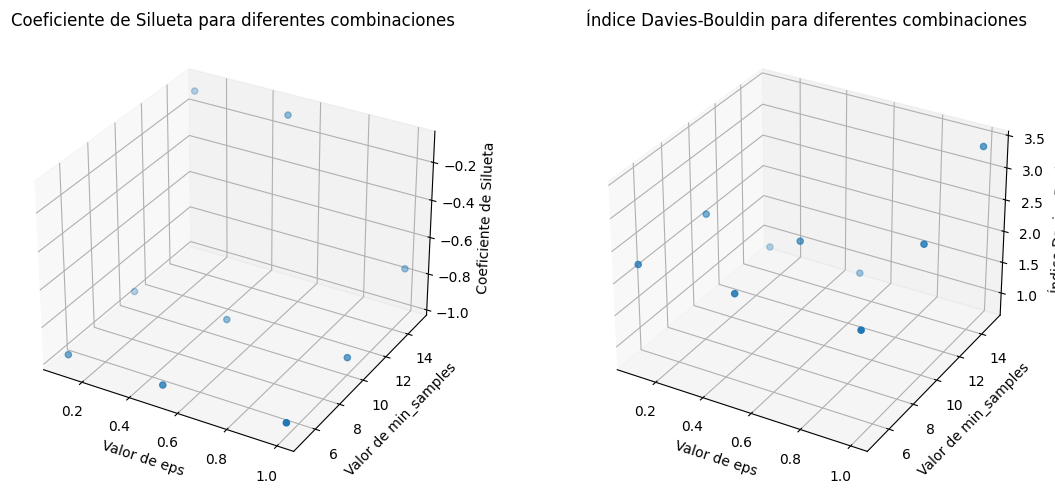

In [5]:
# Graficar las métricas en función de los valores de eps y min_samples
fig = plt.figure(figsize=(12, 5))

# Gráfico del Coeficiente de Silueta
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
eps_values_mesh, min_samples_values_mesh = zip(*parameters)
ax1.scatter(eps_values_mesh, min_samples_values_mesh, silhouette_scores)
ax1.set_xlabel('Valor de eps')
ax1.set_ylabel('Valor de min_samples')
ax1.set_zlabel('Coeficiente de Silueta')
ax1.set_title('Coeficiente de Silueta para diferentes combinaciones')

# Gráfico del Índice Davies-Bouldin
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(eps_values_mesh, min_samples_values_mesh, davies_bouldin_scores)
ax2.set_xlabel('Valor de eps')
ax2.set_ylabel('Valor de min_samples')
ax2.set_zlabel('Índice Davies-Bouldin')
ax2.set_title('Índice Davies-Bouldin para diferentes combinaciones')

plt.tight_layout()
plt.show()